In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [2]:
dataset1 = pd.read_csv('C:\\Users\\HP\\Downloads\\GL_files\\Unsupervized_Learning_Dec_Project\\vehicle.csv')
dataset1

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [3]:
# Label change for the class column 

labels_for_vehicles = {'bus': 0,'van': 1,'car': 2}
dataset_with_labels = dataset1
dataset_with_labels['class'] = [labels_for_vehicles[x] for x in dataset_with_labels['class']]

In [4]:
dataset_with_labels['class']

0      1
1      1
2      2
3      1
4      0
5      0
6      0
7      1
8      1
9      2
10     1
11     2
12     0
13     1
14     0
15     2
16     1
17     0
18     2
19     2
20     0
21     1
22     0
23     0
24     2
25     1
26     2
27     2
28     0
29     2
      ..
816    1
817    2
818    2
819    2
820    2
821    2
822    1
823    2
824    2
825    2
826    2
827    2
828    1
829    1
830    0
831    0
832    2
833    2
834    2
835    0
836    1
837    2
838    1
839    1
840    2
841    2
842    1
843    2
844    2
845    1
Name: class, Length: 846, dtype: int64

In [5]:
dataset_with_labels

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,1
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,1
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,2
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,1
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,0
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,0
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,1
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,1
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,2


In [6]:
dataset1['class'].unique()

array([1, 2, 0], dtype=int64)

In [7]:
dataset1.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.689786,0.791707,0.691081,0.091779,0.148249,0.812770,-0.788736,0.814248,0.676143,0.764361,0.818674,0.585845,-0.250603,0.236685,0.157670,0.298528,0.365552,0.262151
circularity,0.689786,1.000000,0.797180,0.625051,0.154283,0.251407,0.858265,-0.827246,0.856603,0.965729,0.806791,0.850863,0.935950,0.053080,0.144968,-0.011869,-0.106339,0.045652,0.111901
distance_circularity,0.791707,0.797180,1.000000,0.771748,0.158684,0.264621,0.907949,-0.913020,0.896273,0.775149,0.865710,0.890541,0.706950,-0.227001,0.114665,0.266049,0.146027,0.333648,0.364727
radius_ratio,0.691081,0.625051,0.771748,1.000000,0.665363,0.450486,0.738480,-0.792946,0.712744,0.571083,0.798294,0.725598,0.541325,-0.181520,0.049112,0.174469,0.382912,0.472339,0.240627
pr.axis_aspect_ratio,0.091779,0.154283,0.158684,0.665363,1.000000,0.648861,0.103832,-0.183492,0.079566,0.127322,0.273738,0.089750,0.122454,0.152860,-0.058539,-0.032180,0.240201,0.267760,-0.120202
max.length_aspect_ratio,0.148249,0.251407,0.264621,0.450486,0.648861,1.000000,0.165998,-0.180053,0.161603,0.305943,0.319033,0.143745,0.189752,0.295638,0.015446,0.043491,-0.026184,0.143919,0.137781
scatter_ratio,0.812770,0.858265,0.907949,0.738480,0.103832,0.165998,1.000000,-0.973504,0.992078,0.810017,0.951672,0.996328,0.800577,-0.028006,0.074376,0.213512,0.005171,0.118504,0.210794
elongatedness,-0.788736,-0.827246,-0.913020,-0.792946,-0.183492,-0.180053,-0.973504,1.000000,-0.950405,-0.776150,-0.938313,-0.956488,-0.766671,0.103535,-0.052243,-0.186027,-0.114846,-0.216769,-0.187423
pr.axis_rectangularity,0.814248,0.856603,0.896273,0.712744,0.079566,0.161603,0.992078,-0.950405,1.000000,0.813135,0.938182,0.992316,0.798522,-0.015711,0.083219,0.215200,-0.019066,0.099481,0.217430
max.length_rectangularity,0.676143,0.965729,0.775149,0.571083,0.127322,0.305943,0.810017,-0.776150,0.813135,1.000000,0.746657,0.797485,0.866554,0.041283,0.136077,0.001660,-0.104437,0.076770,0.109578


In [8]:
dataset1.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                            int64
dtype: object

In [9]:
dataset1.shape

(846, 19)

In [10]:
dataset1.describe()

# The columns scaled_variance and scaled_variance.1 is showing more changes on their mean and median values 
# The median is commonly used for the imputation when the column shows skewnees in their distribution 

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388,1.249409
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797,0.838691
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000,0.000000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000,2.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000,2.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000,2.000000


In [11]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [12]:
dataset1.isnull().sum()

# 1) Skewness_about1 , skewness_about, scatter_rati, scaled_variance, scalled_variance.1 , scaled_radius_of_gyration.1 are right skewed
# 2) Hence median could be good for treating the missing values 

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000598E7B8>,
      dtype=object)

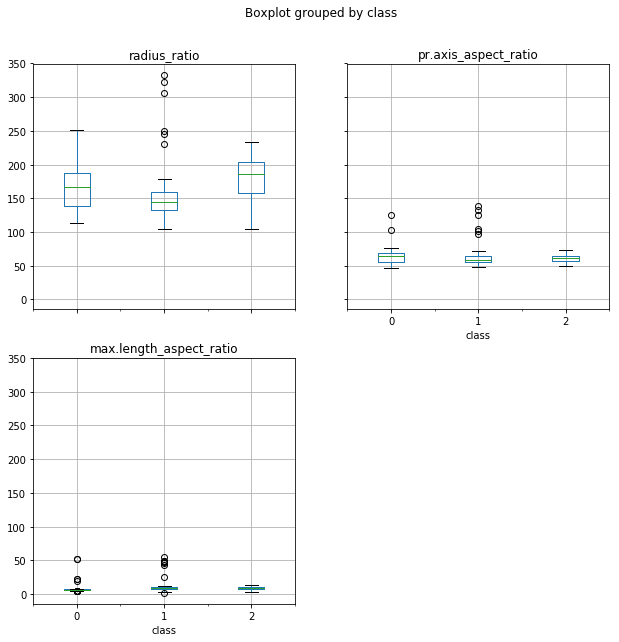

In [13]:
dataset1.boxplot(column = ['radius_ratio','pr.axis_aspect_ratio', 'max.length_aspect_ratio'],figsize = (10,10),by='class')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C2C4BE0>,
      dtype=object)

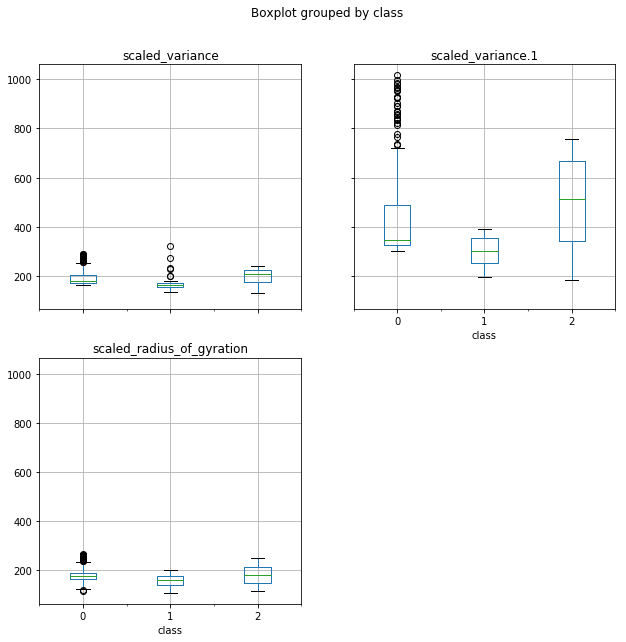

In [14]:
dataset1.boxplot(column = ['scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration'],figsize = (10,10),by='class')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C7696A0>,
      dtype=object)

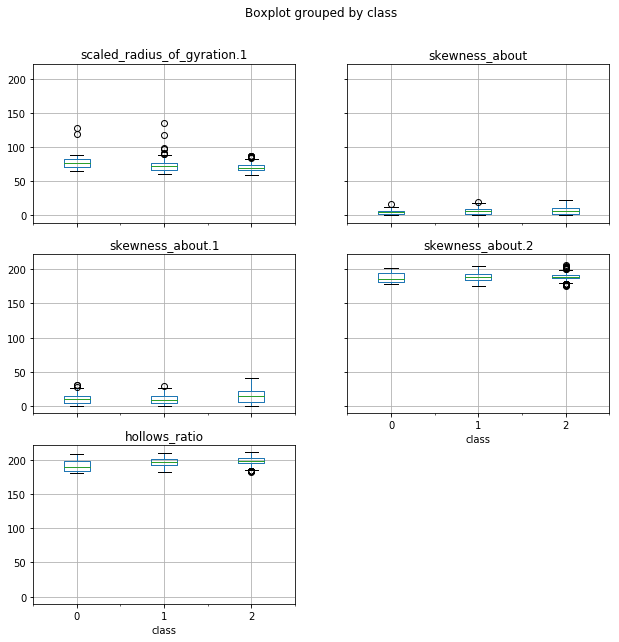

In [15]:
dataset1.boxplot(column = ['scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'], figsize = (10,10),by= 'class')

In [16]:
# dataset1['skewness_about'] = dataset1['skewness_about'].fillna(dataset1['skewness_about'].median(),inplace = True)
# dataset1['skewness_about.1'] = dataset1['skewness_about.1'].fillna(dataset1['skewness_about.1'].median(),inplace = True)
# dataset1['scatter_ratio'] = dataset1['scatter_ratio'].fillna(dataset1['scatter_ratio'].median(),inplace = True)
# dataset1['scaled_variance'] = dataset1['scaled_variance'].fillna(dataset1['scaled_variance'].median(),inplace = True)
# dataset1['scaled_variance.1'] = dataset1['scaled_variance.1'].fillna(dataset1['scaled_variance.1'].median(),inplace = True)
# dataset1['scaled_radius_of_gyration.1'] = dataset1['scaled_radius_of_gyration.1'].fillna(dataset1['scaled_radius_of_gyration.1'].median(),inplace = True)

# Treating the missing values of the columns 
dataset1['skewness_about'].fillna(dataset1['skewness_about'].median(),inplace = True)
dataset1['skewness_about.1'].fillna(dataset1['skewness_about.1'].median(),inplace = True)
dataset1['scatter_ratio'].fillna(dataset1['scatter_ratio'].median(),inplace = True)
dataset1['scaled_variance'].fillna(dataset1['scaled_variance'].median(),inplace = True)
dataset1['scaled_variance.1'].fillna(dataset1['scaled_variance.1'].median(),inplace = True)
dataset1['scaled_radius_of_gyration.1'].fillna(dataset1['scaled_radius_of_gyration.1'].median(),inplace = True)
dataset1['circularity'].fillna(dataset1['circularity'].mean(),inplace = True)
dataset1['distance_circularity'].fillna(dataset1['distance_circularity'].mean(),inplace = True)
dataset1['radius_ratio'].fillna(dataset1['radius_ratio'].mean(),inplace = True)
dataset1['pr.axis_aspect_ratio'].fillna(dataset1['pr.axis_aspect_ratio'].median(),inplace = True)
dataset1['pr.axis_rectangularity'].fillna(dataset1['pr.axis_rectangularity'].median(),inplace = True)
dataset1['scaled_radius_of_gyration'].fillna(dataset1['scaled_radius_of_gyration'].mean(),inplace = True)
dataset1['elongatedness'].fillna(dataset1['elongatedness'].mean(),inplace = True)
dataset1['skewness_about.2'].fillna(dataset1['skewness_about.2'].mean(),inplace = True)

In [17]:
dataset1.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [18]:
# For getting the total count of the missing values on the dataframe 

dataset1.isnull().sum().sum()

# In total, there are 41 missing valueson the dataframe 

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C679F60>,
      dtype=object)

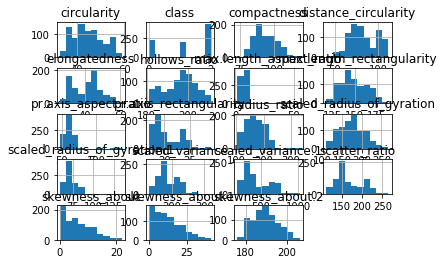

In [19]:
# To get the histogram of the various columns 

dataset1.hist(histtype = 'stepfilled')

In [20]:
# import pylab.rcParams as fig
# fig['figure.figsize'] = 5,10

plt.rcParams['figure.figsize'] = (20,10)


In [21]:
dataset1.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

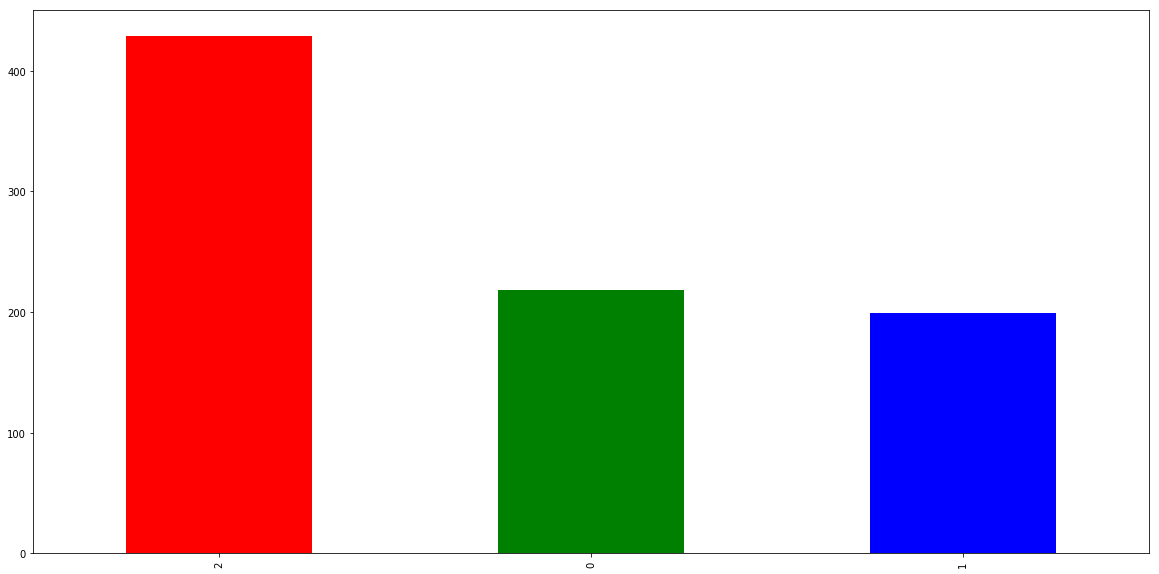

In [22]:
# Plotting the class variable with different colors and measured axis values 

dataset1['class'].value_counts().plot.bar(color = ['red', 'green', 'blue'])

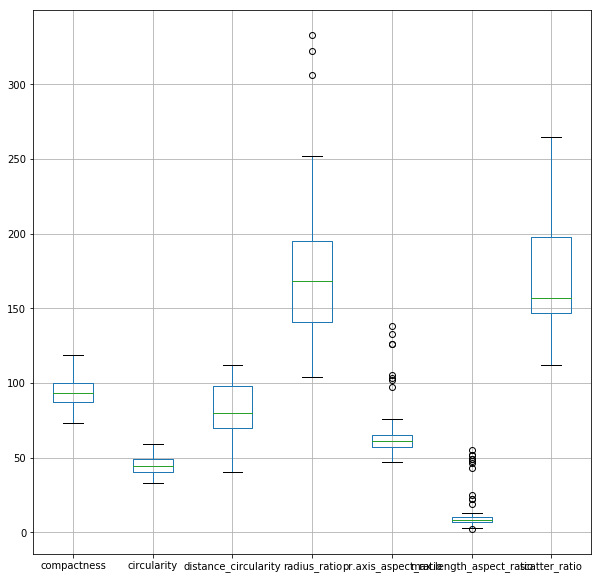

In [23]:
dataset1.boxplot(column = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio'],figsize = (10,10))

# Radius_ratio, pr.axis_aspect_ratio and max.length_aspect_ratio are having maximum of outliers in their box plot 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D521D30>,
      dtype=object)

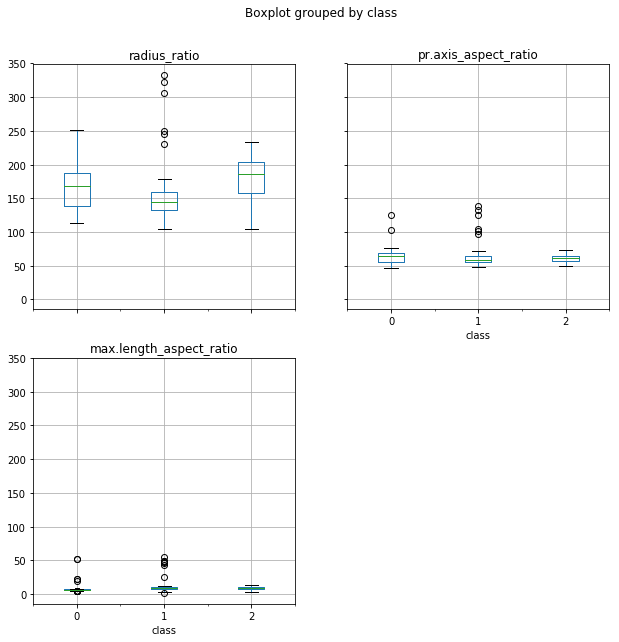

In [24]:
dataset1.boxplot(column = ['radius_ratio','pr.axis_aspect_ratio', 'max.length_aspect_ratio'],figsize = (10,10),by='class')

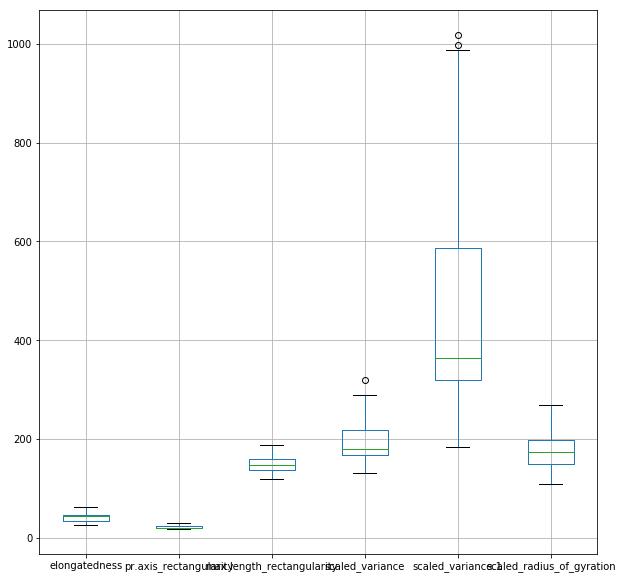

In [25]:
dataset1.boxplot(column = ['elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration'],figsize = (10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D843EB8>,
      dtype=object)

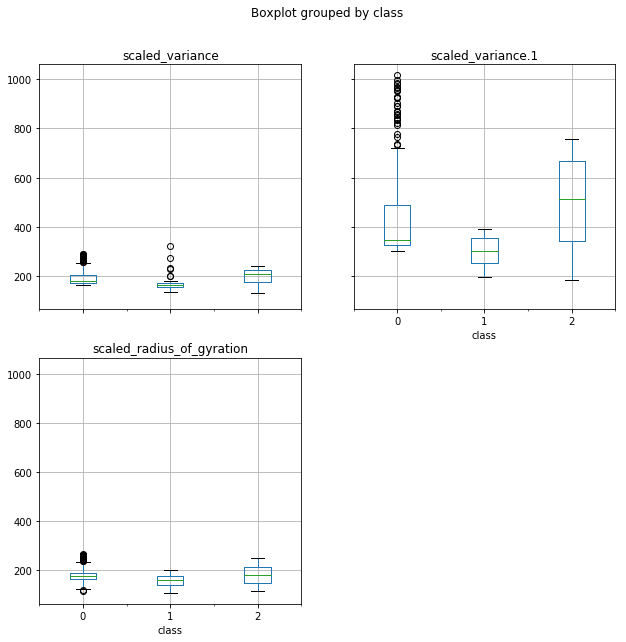

In [26]:
dataset1.boxplot(column = ['scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration'],figsize = (10,10),by='class')

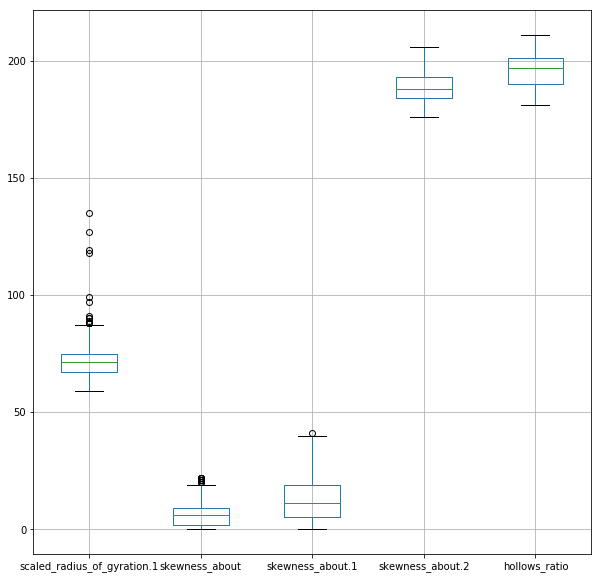

In [27]:
dataset1.boxplot(column = ['scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'], figsize = (10,10))

# Outliers are present on scaled_radius_of_gyration.1 and skewness_about columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F3D7A20>,
      dtype=object)

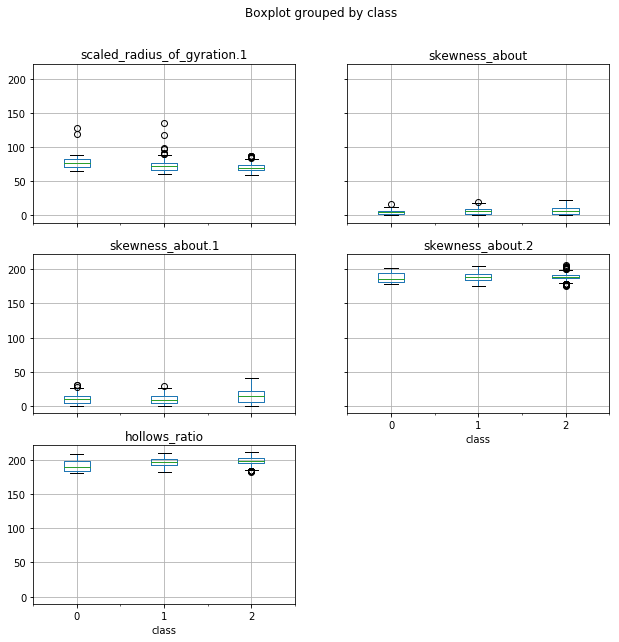

In [28]:
dataset1.boxplot(column = ['scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'], figsize = (10,10),by= 'class')

# Outliers based on the class 

In [29]:
#  The outliers are not badly advantaged when treating the missing values and imputing them with 
#   mean and median on their columns 

# Now, the outliers are to be treated on various columns to frame a good model 



In [30]:
dataset2 = dataset1.drop(labels = ['class'],axis=1)
dataset2

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.000000,83.0,178.000000,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.000000,84.0,141.000000,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.000000,106.0,209.000000,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.000000,82.0,159.000000,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.000000,70.0,205.000000,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183
5,107,44.828775,106.0,172.000000,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183
6,97,43.000000,73.0,173.000000,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204
7,90,43.000000,66.0,157.000000,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202
8,86,34.000000,62.0,140.000000,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208
9,93,44.000000,98.0,168.888095,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204


In [31]:
dataset2.apply(zscore)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.517302,0.056545,0.272965,1.310398,0.311542,-0.207598,0.136580,-0.224342,0.758332,-0.401920,-0.341934,0.285618,-0.327326,-0.073812,0.380870,-0.312193,0.183957
1,-0.325470,-0.624564,0.120112,-0.835442,-0.593753,0.094079,-0.599423,0.520853,-0.610886,-0.344578,-0.593357,-0.619724,-0.513719,-0.059384,0.538390,0.156798,0.013088,0.452977
2,1.254193,0.843549,1.518571,1.201630,0.548738,0.311542,1.148719,-1.144331,0.935290,0.689401,1.097671,1.109379,1.392391,0.074587,1.558727,-0.403383,-0.149552,0.049447
3,-0.082445,-0.624564,-0.007021,-0.296217,0.167907,0.094079,-0.750125,0.648945,-0.610886,-0.344578,-0.912419,-0.738777,-1.466773,-1.265121,-0.073812,-0.291347,1.639494,1.529056
4,-1.054545,-0.135193,-0.769817,1.081803,5.245643,9.444962,-0.599423,0.520853,-0.610886,-0.275646,1.671982,-0.648070,0.408593,7.309005,0.538390,-0.179311,-1.450677,-1.699181
5,1.618730,0.000000,1.518571,0.093223,-1.482357,-0.558308,2.595457,-1.912878,2.868010,1.447652,2.916323,2.934859,2.745114,1.682235,-0.277879,-0.403383,-1.288036,-1.699181
6,0.403605,-0.298317,-0.579118,0.123180,0.421794,-0.558308,-0.478861,0.136580,-0.610886,-0.344578,-0.401920,-0.443979,-0.083307,-0.863208,1.354659,-1.299674,1.802134,1.125526
7,-0.446982,-0.298317,-1.024082,-0.356131,0.421794,0.094079,-0.961108,0.905127,-0.997430,-0.137782,-0.848606,-0.897515,-0.329256,-0.729238,-0.686013,-1.075601,0.663650,0.856507
8,-0.933032,-1.766430,-1.278348,-0.865399,-0.085979,-0.340845,-1.413213,1.673674,-1.383974,-1.447489,-1.518636,-1.226328,-1.927929,-1.131150,-0.890081,0.156798,1.802134,1.663566
9,-0.082445,-0.135193,1.010040,0.000000,0.040964,0.529004,0.425350,-0.631967,0.548746,-0.137782,0.427641,0.372384,-0.698181,-1.131150,-0.481946,0.156798,0.988931,1.125526


In [32]:
dataset2.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.685421,0.789909,0.689840,0.091534,0.148249,0.812620,-0.788643,0.813694,0.676143,0.762070,0.814012,0.585156,-0.249593,0.236078,0.157015,0.298526,0.365552
circularity,0.685421,1.000000,0.793016,0.620967,0.153089,0.251208,0.848891,-0.821901,0.844440,0.961943,0.797083,0.836984,0.926888,0.053015,0.144505,-0.011851,-0.105645,0.045318
distance_circularity,0.789909,0.793016,1.000000,0.767079,0.158287,0.264550,0.905116,-0.911435,0.893105,0.774669,0.861544,0.886040,0.705953,-0.225439,0.114206,0.265266,0.145563,0.332095
radius_ratio,0.689840,0.620967,0.767079,1.000000,0.663327,0.450036,0.734705,-0.789795,0.708665,0.569205,0.793676,0.718723,0.536536,-0.180396,0.048956,0.173618,0.382129,0.471262
pr.axis_aspect_ratio,0.091534,0.153089,0.158287,0.663327,1.000000,0.648724,0.103732,-0.183055,0.079604,0.126909,0.272910,0.089189,0.121885,0.152950,-0.058371,-0.031976,0.239762,0.267725
max.length_aspect_ratio,0.148249,0.251208,0.264550,0.450036,0.648724,1.000000,0.166191,-0.180041,0.161502,0.305943,0.318957,0.143253,0.189704,0.295735,0.015599,0.043422,-0.026180,0.143919
scatter_ratio,0.812620,0.848891,0.905116,0.734705,0.103732,0.166191,1.000000,-0.971576,0.989751,0.809083,0.948662,0.993012,0.799827,-0.027542,0.074458,0.212428,0.005437,0.118817
elongatedness,-0.788643,-0.821901,-0.911435,-0.789795,-0.183055,-0.180041,-0.971576,1.000000,-0.948965,-0.775519,-0.936474,-0.953765,-0.766029,0.103241,-0.052260,-0.185391,-0.114727,-0.216719
pr.axis_rectangularity,0.813694,0.844440,0.893105,0.708665,0.079604,0.161502,0.989751,-0.948965,1.000000,0.810934,0.934227,0.988213,0.796637,-0.015495,0.083767,0.214700,-0.018825,0.099286
max.length_rectangularity,0.676143,0.961943,0.774669,0.569205,0.126909,0.305943,0.809083,-0.775519,0.810934,1.000000,0.744985,0.794615,0.866425,0.041622,0.135852,0.001366,-0.104254,0.076770


In [33]:
sns.pairplot(data = dataset1 ,  diag_kind = 'auto', hue='class')

In [34]:
# outlier detection 
from scipy import stats 

thresold_for_outler = 3
dataset2_with_zscore = np.abs(stats.zscore(dataset2))
z_with_row  =np.where(dataset2_with_zscore > thresold_for_outler)[0]
z_with_col  =np.where(dataset2_with_zscore > thresold_for_outler)[1] 
print(z_with_row)
print(z_with_col)

[  4   4   4  37  37  37  37  44  85 100 100 100 123 132 135 135 135 135
 291 291 321 321 388 388 388 388 388 391 396 513 516 523 523 623 687 687
 706 706 706 733 761 835 835 835]
[ 4  5 13  3  4  5 13  0 11  4  5 13 14 15  3  4  5 13  4  5 10 11  3  4
  5 10 13  5 10 15 14  4  5 14 10 11  4  5 13 10 14  8 10 11]


In [35]:
# Using loop and  z_with_row as count,remove the values inside the class column 
# dataset_y1 = pd.DataFrame()
# for x in z_with_row:
#     dataset_y = dataset_with_labels.drop(dataset_with_labels.index[x]) 
#     dataset_y1 = dataset_y
    

In [36]:
dataset_y = dataset_with_labels.drop([ 4  , 4 ,  4 , 37 , 37 , 37 , 37  ,44 , 85 ,100 ,100 ,100 ,123 ,132 ,135 ,135, 135, 135,
 291 ,291 ,321 ,321 ,388 ,388 ,388 ,388 ,388, 391 ,396, 513 ,516, 523, 523 ,623 ,687 ,687,127,554,815,
 706, 706, 706, 733, 761, 835, 835 ,835])

In [37]:
dataset_y.shape

(821, 19)

In [38]:
print(len(z_with_col))

# There are 44 outlier values when thresold is being set to z= 3 

44


In [39]:
dataset3  = dataset2[(dataset2_with_zscore < 3).all(axis=1)]

In [40]:
dataset3

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.000000,83.0,178.000000,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.000000,84.0,141.000000,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.000000,106.0,209.000000,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.000000,82.0,159.000000,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
5,107,44.828775,106.0,172.000000,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183
6,97,43.000000,73.0,173.000000,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204
7,90,43.000000,66.0,157.000000,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202
8,86,34.000000,62.0,140.000000,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208
9,93,44.000000,98.0,168.888095,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204
10,86,36.000000,70.0,143.000000,61.0,9,133.0,50.0,18.0,130,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202


In [41]:
# sns.pairplot(data = dataset3 ,  diag_kind = 'auto')

# # But still the outlier is being present on the max.length_aspect_ratio

In [42]:
dataset3['max.length_aspect_ratio'][dataset3['max.length_aspect_ratio'] > 18]

127    22
544    19
815    22
Name: max.length_aspect_ratio, dtype: int64

In [43]:
dataset3=dataset3.drop(dataset3[dataset3['max.length_aspect_ratio']==22].index) 
dataset3=dataset3.drop(dataset3[dataset3['max.length_aspect_ratio']==19].index) 
#dataset3.drop(dataset3[dataset3['max.lengt h_aspect_ratio']==815].index) 
# dataset3=dataset3.drop(dataset3[dataset3['max.length_aspect_ratio']==22]) 
# dataset3=dataset3.drop(dataset3[dataset3['max.length_aspect_ratio']==19])

In [44]:
len(dataset3['max.length_aspect_ratio'])

821

In [45]:
dataset3['max.length_aspect_ratio'].sort_values(ascending =True)

655     2
612     3
498     3
230     3
231     3
171     4
381     4
614     4
375     4
411     4
550     4
777     4
444     4
557     4
463     4
374     4
183     4
472     4
688     4
834     4
213     4
260     4
342     4
683     5
138     5
755     5
598     5
120     5
431     5
113     5
       ..
346    12
259    12
668    12
283    12
536    12
517    12
145    12
843    12
117    12
721    12
167    12
400    12
605    12
486    12
404    12
783    12
471    12
824    12
360    12
243    12
545    12
570    12
500    12
740    12
254    12
631    12
415    12
220    13
827    13
476    13
Name: max.length_aspect_ratio, Length: 821, dtype: int64

In [46]:
sns.pairplot(data = dataset3 ,  diag_kind = 'auto')

In [47]:
dataset3.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.682504,0.786690,0.752576,0.223689,0.521757,0.808551,-0.784975,0.809734,0.673842,0.788152,0.810881,0.575313,-0.286932,0.218259,0.159714,0.316342,0.393536
circularity,0.682504,1.000000,0.791610,0.648989,0.221683,0.583794,0.850110,-0.820430,0.847112,0.963651,0.810835,0.839876,0.929506,0.031079,0.144184,-0.012913,-0.092158,0.068286
distance_circularity,0.786690,0.791610,1.000000,0.815108,0.266923,0.691462,0.907675,-0.910336,0.896738,0.771652,0.888477,0.890950,0.702159,-0.278663,0.104454,0.268801,0.157864,0.354624
radius_ratio,0.752576,0.648989,0.815108,1.000000,0.674933,0.479786,0.799870,-0.849827,0.774893,0.585548,0.806712,0.788581,0.559421,-0.427942,0.051590,0.187991,0.434786,0.524012
pr.axis_aspect_ratio,0.223689,0.221683,0.266923,0.674933,1.000000,0.145700,0.228230,-0.325009,0.199077,0.164937,0.247991,0.216764,0.176398,-0.327717,-0.047102,-0.023748,0.409233,0.421807
max.length_aspect_ratio,0.521757,0.583794,0.691462,0.479786,0.145700,1.000000,0.528458,-0.529571,0.528498,0.668119,0.448119,0.491088,0.430916,-0.351873,0.101497,0.151466,0.074913,0.407748
scatter_ratio,0.808551,0.850110,0.907675,0.799870,0.228230,0.528458,1.000000,-0.973027,0.989255,0.809177,0.977609,0.993011,0.792037,-0.043492,0.064610,0.214836,0.026390,0.154395
elongatedness,-0.784975,-0.820430,-0.910336,-0.849827,-0.325009,-0.529571,-0.973027,1.000000,-0.950528,-0.772511,-0.968023,-0.956917,-0.760956,0.128287,-0.044682,-0.187172,-0.131895,-0.243958
pr.axis_rectangularity,0.809734,0.847112,0.896738,0.774893,0.199077,0.528498,0.989255,-0.950528,1.000000,0.812403,0.962963,0.987566,0.788985,-0.027574,0.073202,0.216939,0.001880,0.135837
max.length_rectangularity,0.673842,0.963651,0.771652,0.585548,0.164937,0.668119,0.809177,-0.772511,0.812403,1.000000,0.752931,0.796307,0.866570,0.012772,0.133172,0.002550,-0.091026,0.099115


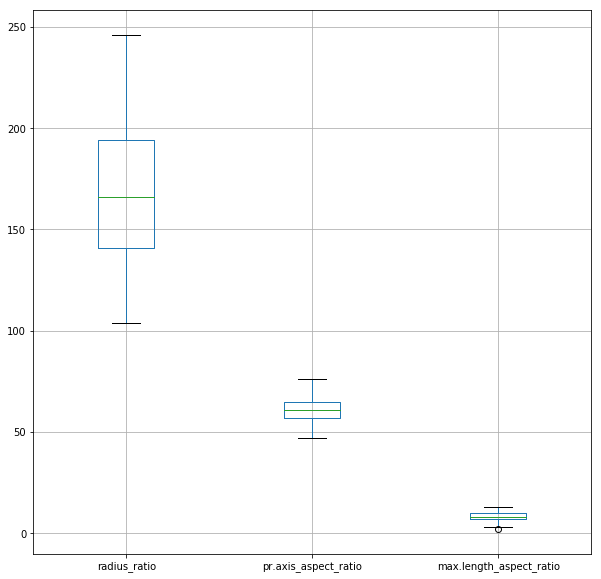

In [48]:
dataset3.boxplot(column = ['radius_ratio','pr.axis_aspect_ratio', 'max.length_aspect_ratio'],figsize = (10,10))

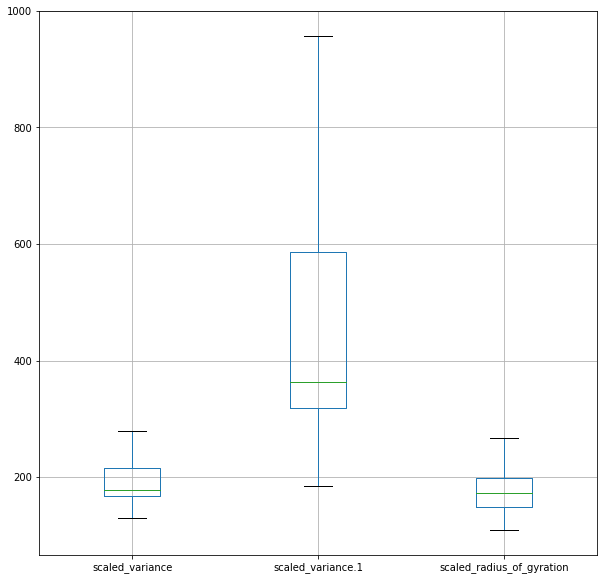

In [49]:
dataset3.boxplot(column = ['scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration'],figsize = (10,10))

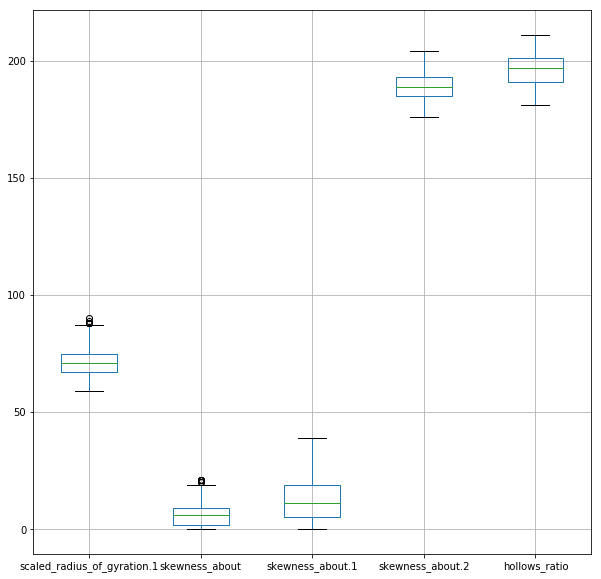

In [50]:
dataset3.boxplot(column = ['scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'], figsize = (10,10))

In [51]:
dataset3.shape

(821, 18)

In [52]:
# Understanding the attributes and Relationships 
# And to find the best columns for the Principal Component Analysis 

dataset3_cov = np.cov(dataset3.T)
dataset3_cov.shape   
# This is the covariance matrix of the given dataset3 which is said to contain the related information
# this related information need to be feed to the model 
# for this, the covariance matrix needed to be centered to new axis and axis shifting can be done through Eigen concepts


(18, 18)

In [53]:
eig_vals, eig_vecs = np.linalg.eig(dataset3_cov)
print('Eigen Vectors \n', eig_vecs)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[-3.61335760e-02 -7.05439069e-02 -2.59181570e-02  1.84839768e-01
  -1.52994116e-01 -5.96573748e-02 -1.80421833e-01  9.49499954e-02
   5.55374063e-01 -7.20229248e-01 -1.20681972e-01 -1.52186791e-01
  -1.18600458e-01 -4.75355225e-02  1.08773074e-02 -4.21094249e-02
  -7.86373840e-02  3.24061805e-02]
 [-2.84665661e-02  7.37687530e-02 -1.11371188e-01  1.02326047e-01
  -4.55806566e-02  2.20559817e-02  1.26301387e-01 -6.40067943e-02
   7.70982301e-02  4.65743202e-02  3.86063466e-02  9.79995374e-02
   3.44145101e-02 -1.49148207e-01 -2.63941656e-02  2.97292116e-01
   4.53645171e-02  9.02488940e-01]
 [-7.73372864e-02 -9.71956877e-02 -1.15508832e-01  4.37427859e-01
   2.26717663e-01 -4.19619176e-01  1.87858555e-01  4.70893927e-01
  -3.69172305e-01 -1.76889186e-01  2.29225125e-01 -1.87801602e-01
   1.63873438e-01 -9.58028548e-02  2.37814143e-03 -2.71491123e-02
   5.63255673e-02  5.82038363e-03]
 [-1.40060358e-01 -6.57714167e-01 -5.69382712e-01 -2.53172441e-01
   3.82135485e-02  1.

In [54]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 96.39444849  98.02301909  99.08515202  99.33735896  99.53998407
  99.6631351   99.77162931  99.83851383  99.90081037  99.93477745
  99.96125023  99.97702079  99.98517775  99.99166144  99.99507538
  99.99796082  99.99969208 100.        ]


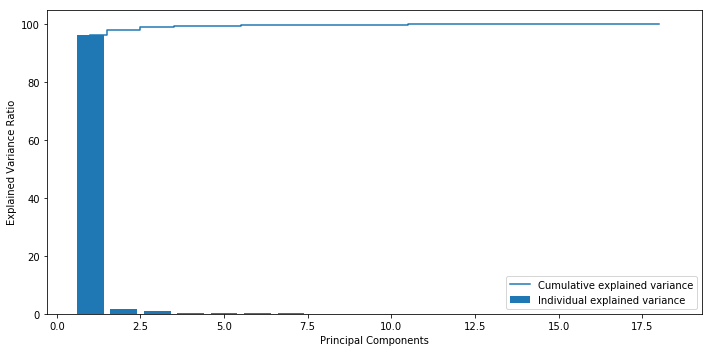

In [55]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 1, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# dataset1_x = dataset1.drop(labels = ['class'],axis=1)
dataset1_x = dataset3
dataset1_y = dataset_y['class']
X_train,X_test,y_train,y_test = train_test_split(dataset1_x,dataset1_y,test_size = 0.30,random_state = 5)
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)


X_reduced = pd.DataFrame(PCA(n_components=5).fit_transform(dataset1_x))
cov_matrix = np.cov(X_reduced.T)
print('Covariance Matrix \n%s', cov_matrix)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Covariance Matrix 
%s [[ 3.31067725e+04 -1.12023128e-13  1.48624744e-13 -9.58019572e-14
  -1.10913988e-14]
 [-1.12023128e-13  5.59334247e+02 -1.64152702e-13 -2.77284970e-16
   6.93212425e-16]
 [ 1.48624744e-13 -1.64152702e-13  3.64790645e+02 -1.38642485e-15
   5.61502064e-15]
 [-9.58019572e-14 -2.77284970e-16 -1.38642485e-15  8.66207335e+01
  -2.91149219e-15]
 [-1.10913988e-14  6.93212425e-16  5.61502064e-15 -2.91149219e-15
   6.95918023e+01]]


In [57]:
# sns.pairplot(data = X_reduced,diag_kind = 'kde')

In [58]:
model = svm.SVC()
model.fit(X_train_sd, y_train)
print ('score', model.score(X_train_sd, y_train))

score 0.9721254355400697


In [59]:

model.fit(X_train_sd, y_train)
print ('score', model.score(X_test_sd, y_test))

score 0.9676113360323887


In [61]:


model1 = svm.SVC(kernel = 'linear',C= 1,random_state= 5)
model1.fit(X_train_sd, y_train)
print ('score', model1.score(X_train_sd, y_train))
model1.fit(X_train_sd, y_train)
print ('score', model1.score(X_test_sd, y_test))

score 0.9547038327526133
score 0.9635627530364372


In [62]:
model2 = svm.SVC(kernel = 'linear',C= 0.5,random_state= 5)
model2.fit(X_train_sd, y_train)
print ('score', model2.score(X_train_sd, y_train))
model2.fit(X_train_sd, y_train)
print ('score', model2.score(X_test_sd, y_test))

score 0.9494773519163763
score 0.9433198380566802


In [63]:
model3 = svm.SVC(kernel = 'linear',C= 0.05,random_state= 5)
model3.fit(X_train_sd, y_train)
print ('score', model3.score(X_train_sd, y_train))
model3.fit(X_train_sd, y_train)
print ('score', model3.score(X_test_sd, y_test))

score 0.9233449477351916
score 0.9190283400809717


In [67]:
model4 = svm.SVC(kernel = 'linear',C= 0.01,random_state= 5)
model4.fit(X_train_sd, y_train)
print ('score', model4.score(X_train_sd, y_train))
model4.fit(X_train_sd, y_train)
print ('score', model4.score(X_test_sd, y_test))

score 0.8954703832752613
score 0.8906882591093117


In [72]:
model5 = svm.SVC(kernel = 'rbf',gamma = 0.1, C=1,random_state=5)
model5.fit(X_train_sd, y_train)
print ('score', model5.score(X_train_sd, y_train))
model5.fit(X_train_sd, y_train)
print ('score', model5.score(X_test_sd, y_test))

score 0.9773519163763066
score 0.9635627530364372


In [73]:
model6 = svm.SVC(kernel = 'rbf',gamma = 0.1, C=0.5,random_state=5)
model6.fit(X_train_sd, y_train)
print ('score', model6.score(X_train_sd, y_train))
model6.fit(X_train_sd, y_train)
print ('score', model6.score(X_test_sd, y_test))

score 0.9686411149825784
score 0.9554655870445344


In [74]:
model7 = svm.SVC(kernel = 'rbf',gamma = 0.1, C=0.05,random_state=5)
model7.fit(X_train_sd, y_train)
print ('score', model6.score(X_train_sd, y_train))
model7.fit(X_train_sd, y_train)
print ('score', model7.score(X_test_sd, y_test))

score 0.9686411149825784
score 0.6437246963562753


In [75]:
model8 = svm.SVC(kernel = 'rbf',gamma = 0.1, C=0.01,random_state=5)
model8.fit(X_train_sd, y_train)
print ('score', model8.score(X_train_sd, y_train))
model8.fit(X_train_sd, y_train)
print ('score', model8.score(X_test_sd, y_test))

score 0.524390243902439
score 0.48582995951417


In [78]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': (1,0.5,0.05,0.01),'kernel': ('linear','rbf'),'gamma': (0.1,1,10) }

gs = GridSearchCV(model,param_grid,cv= 10)

In [79]:
gs.fit(X_train_sd, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': (1, 0.5, 0.05, 0.01), 'kernel': ('linear', 'rbf'), 'gamma': (0.1, 1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [80]:
gs.best_params_


# {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
# The above parameters seems to be the best fit 

{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}

In [81]:
gs.cv_results_['params']

# 24 combinations will get obtained

[{'C': 1, 'gamma': 0.1, 'kernel': 'linear'},
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 1, 'kernel': 'linear'},
 {'C': 1, 'gamma': 1, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 10, 'kernel': 'linear'},
 {'C': 1, 'gamma': 10, 'kernel': 'rbf'},
 {'C': 0.5, 'gamma': 0.1, 'kernel': 'linear'},
 {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 0.5, 'gamma': 1, 'kernel': 'linear'},
 {'C': 0.5, 'gamma': 1, 'kernel': 'rbf'},
 {'C': 0.5, 'gamma': 10, 'kernel': 'linear'},
 {'C': 0.5, 'gamma': 10, 'kernel': 'rbf'},
 {'C': 0.05, 'gamma': 0.1, 'kernel': 'linear'},
 {'C': 0.05, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 0.05, 'gamma': 1, 'kernel': 'linear'},
 {'C': 0.05, 'gamma': 1, 'kernel': 'rbf'},
 {'C': 0.05, 'gamma': 10, 'kernel': 'linear'},
 {'C': 0.05, 'gamma': 10, 'kernel': 'rbf'},
 {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'},
 {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 0.01, 'gamma': 1, 'kernel': 'linear'},
 {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'},
 {'C': 0.01, 'gamma': 1

In [85]:
gs.cv_results_['mean_train_score']

# Accuracy score for train models



array([0.9541218 , 0.97599482, 0.9541218 , 1.        , 0.9541218 ,
       1.        , 0.95179922, 0.96786577, 0.95179922, 0.77816305,
       0.95179922, 0.5243909 , 0.91811647, 0.63510846, 0.91811647,
       0.5243909 , 0.91811647, 0.5243909 , 0.89410866, 0.5243909 ,
       0.89410866, 0.5243909 , 0.89410866, 0.5243909 ])

In [84]:
gs.cv_results_['mean_test_score']

# Accuracy score for test models

array([0.94076655, 0.94425087, 0.94076655, 0.74390244, 0.94076655,
       0.52439024, 0.93902439, 0.94599303, 0.93902439, 0.59581882,
       0.93902439, 0.52439024, 0.91114983, 0.6271777 , 0.91114983,
       0.52439024, 0.91114983, 0.52439024, 0.87979094, 0.52439024,
       0.87979094, 0.52439024, 0.87979094, 0.52439024])

In [ ]:
# 0.96786577 - Best Accuracy score for Train model
# 0.94599303 - Best Accuracy score for Test model